# Day & Night Image Classification Model

In [1]:
## Importing libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import helpers

#### Setting up the data directories

In [3]:
## Image dataset directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

#### Loading the datasets
These first few lines of code will load the training day/night images and store all of them in a variable, IMAGE_LIST. This list contains the images and their associated label ("day" or "night"). For example, the first image-label pair in IMAGE_LIST can be accessed by index:  IMAGE_LIST[0][:].


'day'

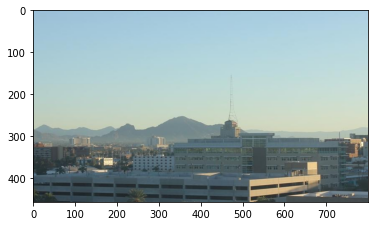

In [10]:
IMAGE_LIST = helpers.load_dataset(image_dir_training)
#print(IMAGE_LIST)
len(IMAGE_LIST)
IMAGE_LIST[100][1]
plt.imshow(IMAGE_LIST[0][0])
IMAGE_LIST[100][1]

### Visualizing the dataset

In [11]:
# Select an image and its label by list index
image_index = 0

selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
print("SHAPE:",selected_image.shape,"\nLABEL:", selected_label)

SHAPE: (458, 800, 3) 
LABEL: day


### Preprocessing the data

In [12]:
## Standardize the input images
def standardize_output(image):
    return cv2.resize(image,(1100,600))

In [13]:
## Encode the images, by assigning 0/1 to night/day
def encode(label):
    if label=='night':
        return 0
    return 1

In [14]:
## Generate a standardized list of images
# Input : image-label pairs
# Output: list of **standardized** images which are of same size and have numerical labels attached
def standardize(image_list):
    output = []
    for i in image_list:
        image , label = i[0], i[1]
        output.append((standardize_output(image), encode(label)))
    return output

In [15]:
## Standardize images by invoking the above functions on real data
STANDARDIZED_LIST = standardize(IMAGE_LIST)

#### Visualize the Standardized Data

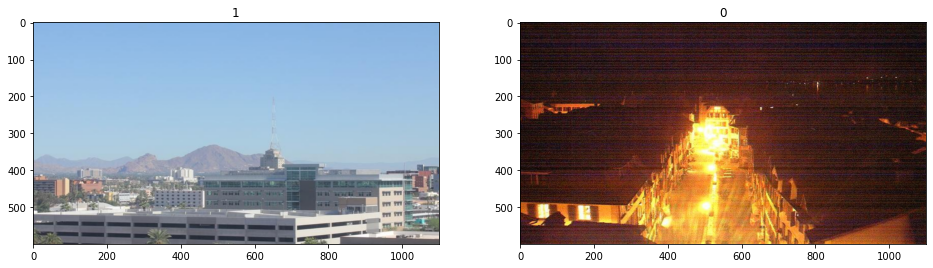

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.imshow(STANDARDIZED_LIST[14][0])
ax1.set_title(STANDARDIZED_LIST[14][1])

ax2.imshow(STANDARDIZED_LIST[210][0])
ax2.set_title(STANDARDIZED_LIST[210][1]);

### Feature Extraction
Measurable component of the image that helps the classifier distinguish it from other images.

In [17]:
## Calculate average brightness of an image
def avg_brightness(image):
    # convert RGB to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    #plt.imshow(hsv_image)
    sum_value_channel = np.sum(hsv_image[:,:,2])
    img_area = 600*1100
    return sum_value_channel/img_area
    

### Classification

In [25]:
def classify(image):
    avg = avg_brightness(image)
    predicted_label = 0 #default
    threshold = 95.0 #arbitrarily 97---101
    if(avg > threshold):
        predicted_label=1
    return predicted_label

### Testing

In [26]:
import random
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)
random.shuffle(STANDARDIZED_TEST_LIST)


In [27]:
def misclassified_images(test_images):
    misclass=[]
    for i in test_images:
        img,true_label=i[0],i[1]
        predicted_label=classify(img)
        print(f'true_label: {true_label} predicted_label: {predicted_label}')
        if(predicted_label!=true_label):
            misclass.append((img,predicted_label))
    return misclass

### Accuracy

In [28]:
total = len(STANDARDIZED_TEST_LIST)
wrong = len(misclassified_images(STANDARDIZED_TEST_LIST))
correct = total - wrong
print("ACCURACY = ", correct/total)
print("NUMBER OF MISCLASSIFIED IMAGES = ",wrong)
print("TOTAL IMAGES = ",total)

true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label

#### Exploring Misclassified Images

true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label: 0 predicted_label: 0
true_label: 0 predicted_label: 0
true_label: 1 predicted_label: 1
true_label

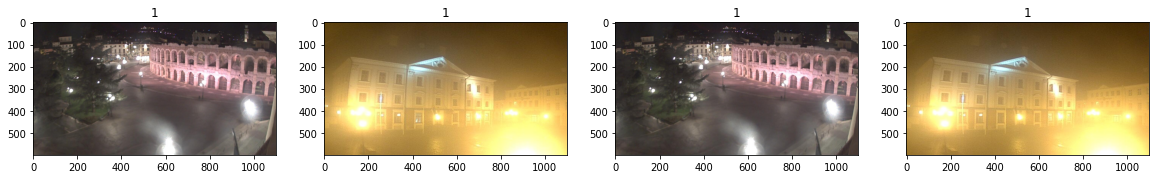

In [30]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
MISCLASSIFIED = misclassified_images(STANDARDIZED_TEST_LIST)
ax1.imshow(MISCLASSIFIED[0][0])
ax1.set_title(MISCLASSIFIED[0][1])
ax2.imshow(MISCLASSIFIED[3][0])
ax2.set_title(MISCLASSIFIED[3][1])
ax3.imshow(MISCLASSIFIED[2][0])
ax3.set_title(MISCLASSIFIED[2][1])
ax4.imshow(MISCLASSIFIED[13][0])
ax4.set_title(MISCLASSIFIED[13][1])
print("Predicted Label = Night : 0, Day : 1")